
# <center> BITCOIN PRICE PREDICTION </center>

For downloading the dataset: 

https://github.com/prathimacode-hub/ML-ProjectKart/tree/main/Bitcoin%20Price%20Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Reading csv file
df = pd.read_csv('bitcoin_dataset.csv')

In [3]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [4]:
df.shape

(2906, 24)

In [5]:
#Get information about data and its types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [6]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


### Check for missing values

In [7]:
df.isna().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

<AxesSubplot:>

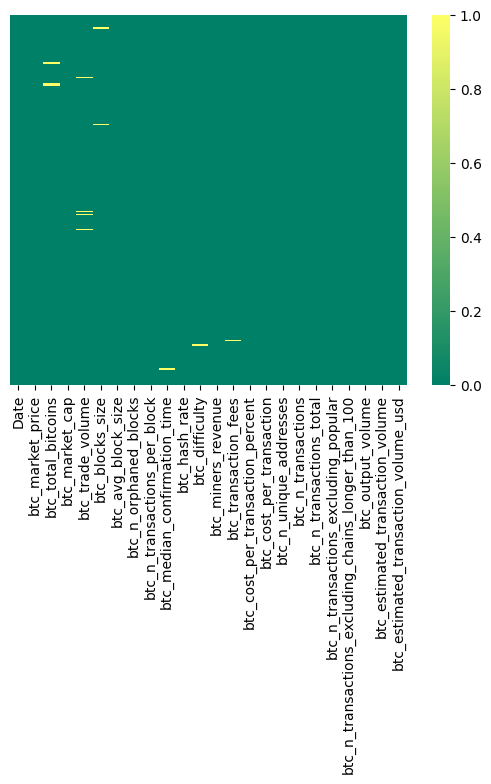

In [8]:
sns.heatmap(df.isna(), yticklabels= False , cmap='summer')

# EDA

## Using *feature-engine* library

In [9]:
#pip install feature-engine
#$ pip install -U feature-engine  # Update

## handeling missing values

In [10]:
from feature_engine.imputation import MeanMedianImputer

In [11]:
median_imputer = MeanMedianImputer(imputation_method='mean')
median_imputer.fit(df)
df = median_imputer.transform(df)

<AxesSubplot:>

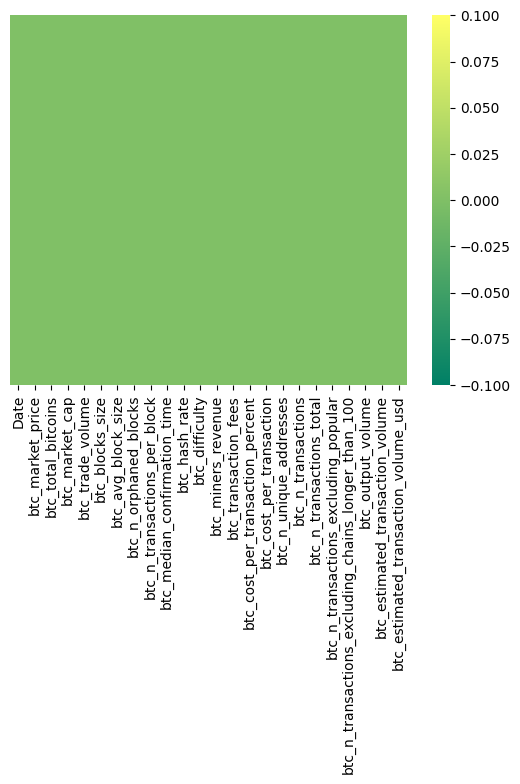

In [12]:
sns.heatmap(df.isna() , yticklabels=False , cmap='summer')

In [13]:
#df.hist(bins=100 , figsize=(20,20))

In [14]:
df = df.drop('Date',axis=1)

In [15]:
#Let's check which feature has maximum corelation with our dependent feature- btc_market_price
df.corr()["btc_market_price"].sort_values(ascending = False)

btc_market_price                                       1.000000
btc_market_cap                                         0.999783
btc_miners_revenue                                     0.986732
btc_estimated_transaction_volume_usd                   0.968308
btc_hash_rate                                          0.920876
btc_difficulty                                         0.916913
btc_trade_volume                                       0.868608
btc_cost_per_transaction                               0.815507
btc_transaction_fees                                   0.806568
btc_n_transactions_total                               0.680048
btc_blocks_size                                        0.674059
btc_n_unique_addresses                                 0.663917
btc_n_transactions                                     0.569603
btc_n_transactions_excluding_chains_longer_than_100    0.567281
btc_n_transactions_excluding_popular                   0.558416
btc_n_transactions_per_block            

## Visualizing the data

<AxesSubplot:>

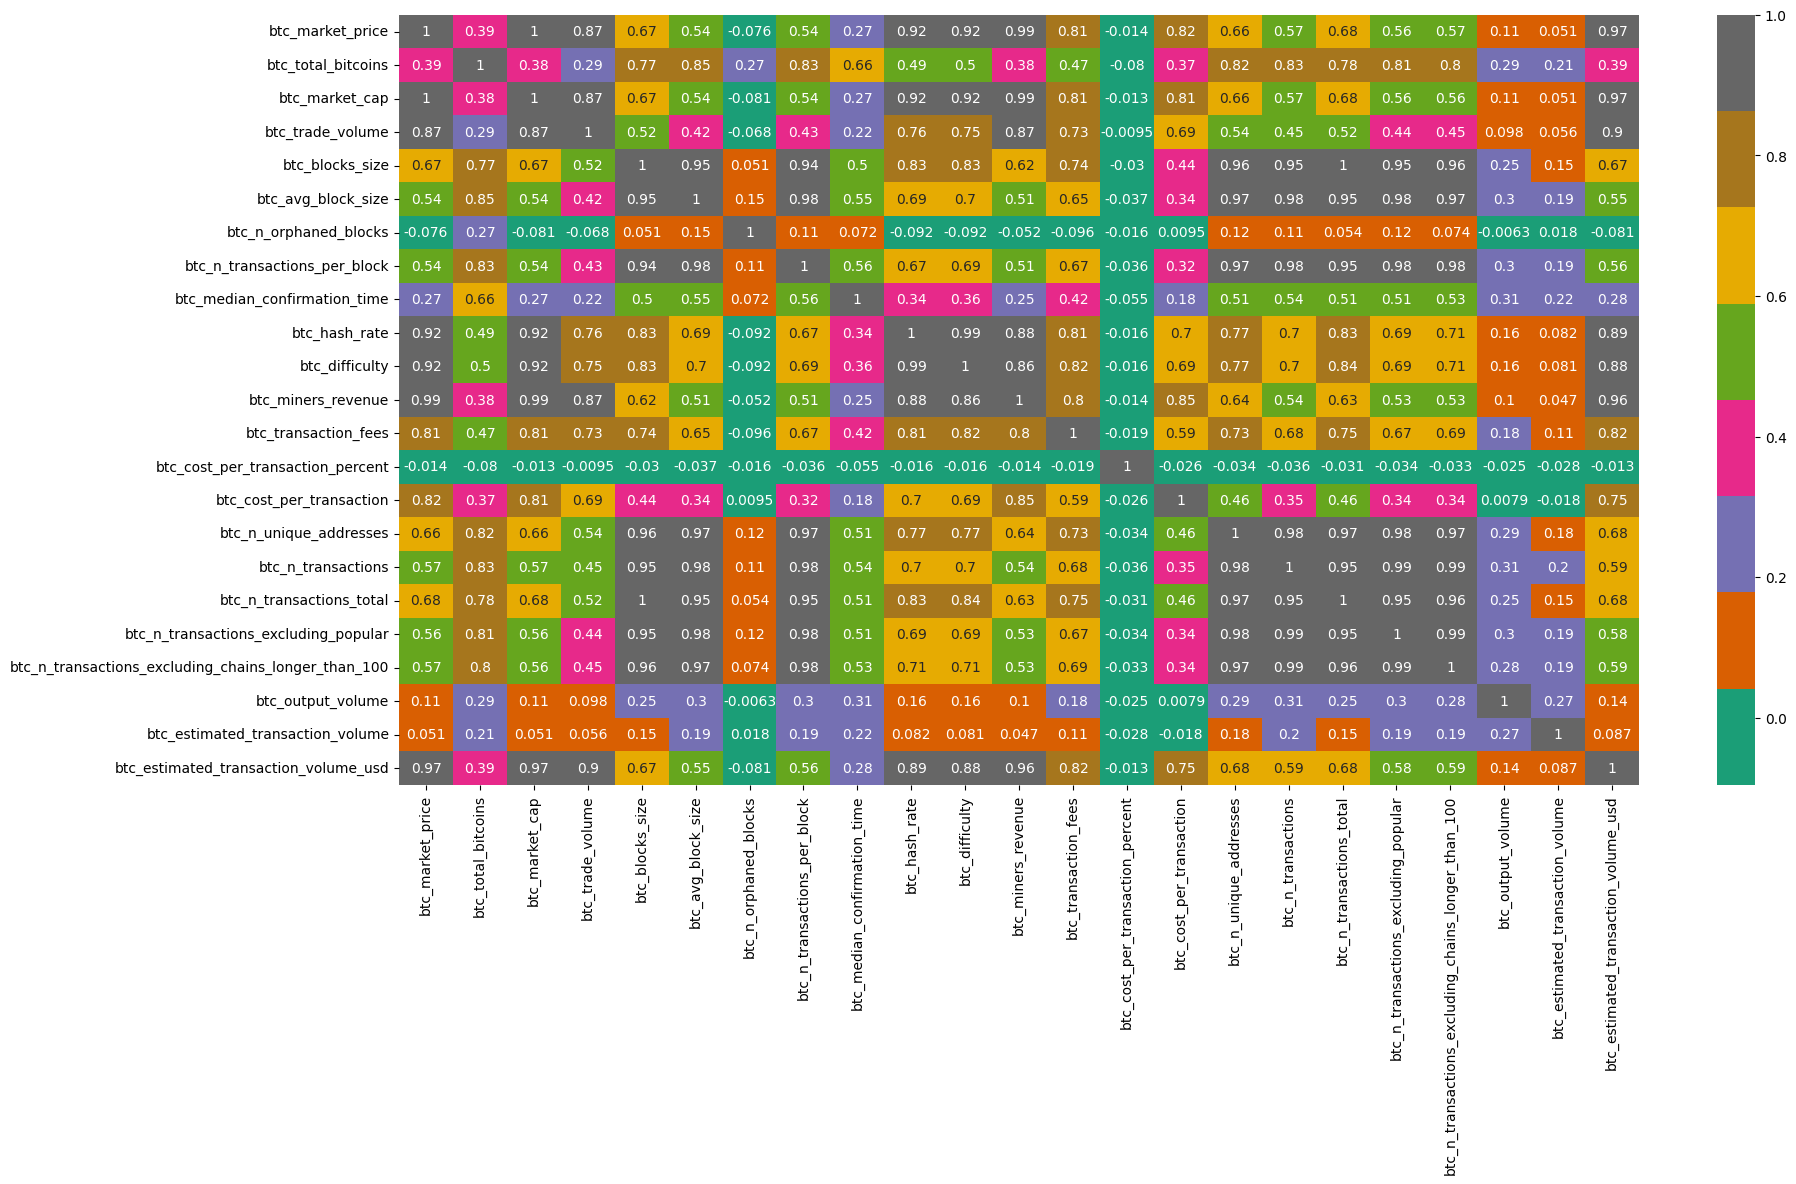

In [16]:
# Check for Corelation between Features
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),yticklabels=True,annot=True,cbar=True,cmap='Dark2')

- Features  'btc_cost_per_transaction_percent', 'btc_n_orphaned_blocks' are negatively related to the dependent feature.
- Also, 'btc_market_price' and 'btc_market_cap' are highly related with each other.

- Correlation only checks linear relationship between features,so in order to look into further relationships,we can use scatterplots.


- The distribution of dependent variable is Positively skewed.

---

## Handeling Outliers

In [17]:
from feature_engine.outliers import OutlierTrimmer

In [18]:
df_out = df

ot = OutlierTrimmer(capping_method='quantiles' , tail='right' , fold=0.05)
df_out = ot.fit_transform(df_out)

In [19]:
#df_out.hist(bins=100, figsize=(20,20))

In [20]:
df.shape , df_out.shape

((2906, 23), (1987, 23))

---

## Feature Scaling

In [21]:
df_copy = df
X = df_copy.drop('btc_market_price',axis=1)
Y = df_copy['btc_market_price']  

In [22]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=92)  

In [23]:
# Standard scaling our data  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train.shape , X_test.shape, Y_train.shape, Y_test.shape

((2034, 22), (872, 22), (2034,), (872,))

## Model Building & Evaluation

### Keras Deep neural network for regression

In [25]:
#Importing libraries required to build neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation , Dropout
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

In [26]:
earlystoping = EarlyStopping(monitor='val_loss' , mode='min' , patience=50 , verbose=1)

checkpoint_path = 'weights.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', mode='min', save_best_only=True , verbose=1)

In [27]:
def model_creator():
    
    model = Sequential()
    model.add(Dense(25, input_dim=X.shape[1], activation='relu')) # Input layer 1
    model.add(Dense(10, activation='relu')) # Hidden layer 2
    model.add(Dense(8, activation='relu')) # Hidden layer 3
    model.add(Dense(5, activation='relu')) # Hidden layer 4
    model.add(Dense(1,activation='linear')) # Output layer 

    model.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics='accuracy')
    return model

In [28]:
model_nn = model_creator()

In [29]:
model_nn.fit(X_train,Y_train,
          validation_data=(X_test,Y_test),
          epochs=500,
          callbacks=[checkpoint])

Epoch 1/500


61/64 [===========================>..] - ETA: 0s - loss: 838.8732 - accuracy: 0.0307
Epoch 1: val_loss improved from inf to 843.88367, saving model to weights.h5
64/64 [==============================] - 2s 12ms/step - loss: 836.4029 - accuracy: 0.0295 - val_loss: 843.8837 - val_accuracy: 0.0011
Epoch 2/500
43/64 [===================>..........] - ETA: 0s - loss: 848.2842 - accuracy: 7.2674e-04
Epoch 2: val_loss improved from 843.88367 to 836.26825, saving model to weights.h5
64/64 [==============================] - 0s 4ms/step - loss: 833.3179 - accuracy: 4.9164e-04 - val_loss: 836.2682 - val_accuracy: 0.0011
Epoch 3/500
63/64 [============================>.] - ETA: 0s - loss: 808.5280 - accuracy: 4.9603e-04
Epoch 3: val_loss improved from 836.26825 to 787.96399, saving model to weights.h5
64/64 [==============================] - 0s 4ms/step - loss: 811.2169 - accuracy: 4.9164e-04 - val_loss: 787.9640 - val_accuracy: 0.0011
Epoch 4/500
57/64 [=========================>....] - ETA: 0s -

<AxesSubplot:>

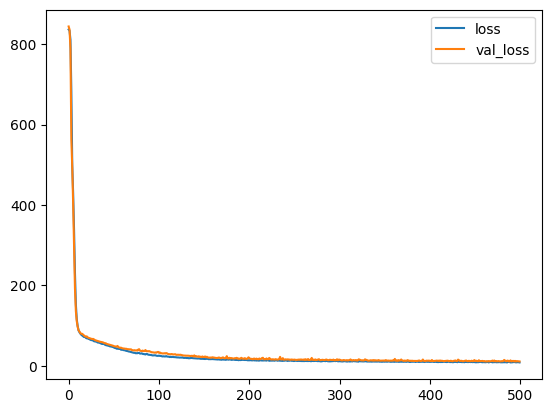

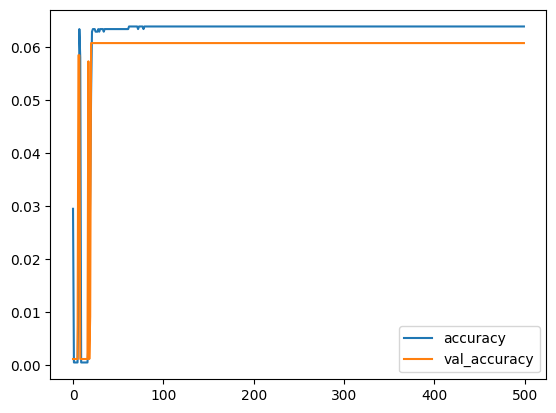

In [30]:
history = pd.DataFrame(model_nn.history.history)
history[['loss','val_loss']].plot()
history[['accuracy','val_accuracy']].plot()

In [31]:
model_nn.load_weights( 'weights.h5')
Y_pred_net = model_nn.predict(X_test)

28/28 [==============================] - 0s 2ms/step


In [32]:
#Using MEAN ABSOLUTE ERROR,R2 SCORE as evaluation matrix
from sklearn.metrics import mean_absolute_error,r2_score

In [33]:
mae_net = mean_absolute_error(Y_pred_net,Y_test)
print('MAE FOR NEURAL NETWORK :',mae_net)
r2_net = r2_score(Y_pred_net,Y_test)
print('R2 SCORE FOR NEURAL NETWORK :',r2_net)

MAE FOR NEURAL NETWORK : 10.635755022426126
R2 SCORE FOR NEURAL NETWORK : 0.999839400757551


---
---

df_out dataframe

In [34]:
X = df_out.drop('btc_market_price',axis=1)
Y = df_out['btc_market_price'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=92)   

scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


checkpoint_path = 'weights_out.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', mode='min', save_best_only=True , verbose=1)

In [35]:
model_out = model_creator()

In [36]:
model_out.fit(X_train,Y_train,
          validation_data=(X_test,Y_test),
          epochs=500,
          callbacks=[checkpoint])

Epoch 1/500


39/44 [=========================>....] - ETA: 0s - loss: 262.7658 - accuracy: 0.0304    
Epoch 1: val_loss improved from inf to 262.38739, saving model to weights_out.h5
44/44 [==============================] - 2s 10ms/step - loss: 262.3792 - accuracy: 0.0309 - val_loss: 262.3874 - val_accuracy: 0.0318
Epoch 2/500
43/44 [============================>.] - ETA: 0s - loss: 261.2891 - accuracy: 0.0305  
Epoch 2: val_loss improved from 262.38739 to 262.23248, saving model to weights_out.h5
44/44 [==============================] - 0s 5ms/step - loss: 261.9724 - accuracy: 0.0309 - val_loss: 262.2325 - val_accuracy: 0.0318
Epoch 3/500
24/44 [===============>..............] - ETA: 0s - loss: 255.0215 - accuracy: 0.0326
Epoch 3: val_loss improved from 262.23248 to 262.18280, saving model to weights_out.h5
44/44 [==============================] - 0s 5ms/step - loss: 261.8956 - accuracy: 0.0309 - val_loss: 262.1828 - val_accuracy: 0.0318
Epoch 4/500
24/44 [===============>..............] - ETA: 0s

<AxesSubplot:>

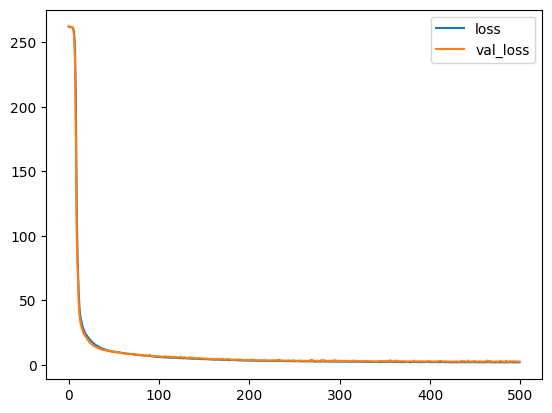

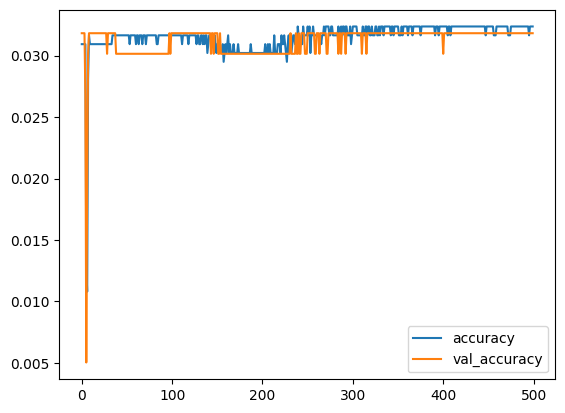

In [37]:
history = pd.DataFrame(model_out.history.history)
history[['loss','val_loss']].plot()
history[['accuracy','val_accuracy']].plot()

In [38]:
model_out.load_weights( 'weights_out.h5')
Y_pred_net = model_out.predict(X_test)

mae_net_out = mean_absolute_error(Y_pred_net,Y_test)
print('MAE FOR NEURAL NETWORK :',mae_net_out)
r2_net_out = r2_score(Y_pred_net,Y_test)
print('R2 SCORE FOR NEURAL NETWORK :',r2_net_out)

19/19 [==============================] - 0s 2ms/step
MAE FOR NEURAL NETWORK : 2.3458670094964047
R2 SCORE FOR NEURAL NETWORK : 0.9998122928859541


---